# Telecom Churn Prediction

### <font color='blue'>Business Goals:</font>
1. Retaining high profitable customers is the number one business goal.
2. This project is based on the Indian and Southeast Asian market.
3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### <font color='blue'>Analysis Goals:</font>
1. Predict which customers are at high risk of churn
2. Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
3. Prepaid is the most common model in India and southeast Asia. Focus on prepaid customers.
3. Curn definition used-- "Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time." In this project, we will use the usage-based definition to define churn.
4. In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
5. especially high-value customers go through  three phases of customer lifecycle: a. The ‘good’ phase, b. The ‘action’ phase, c. The ‘churn’ phase


### Import libraries and load datafile

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from numpy import loadtxt
from numpy import sort
from sklearn.feature_selection import SelectFromModel
import sys
!{sys.executable} -m pip install xgboost

In [2]:
telechurn = pd.read_csv("telecom_churn_data.csv")
original = telechurn.copy()
telechurn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Data cleaning

##### (A) CHECK for Duplicate values in a dataset

In [3]:
sum(telechurn.duplicated(subset = 'mobile_number')) == 0

True

##### (B) CHECK for NULL and NAN values in dataset

In [4]:
round(100*(telechurn.isnull().sum()/len(telechurn.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [5]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telechurn.isnull().sum()/len(telechurn.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [6]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]
num_cols = [column for column in telechurn.columns if column not in id_cols + date_cols + cat_cols]
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))


#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


In [7]:
# drop id and date columns
telechurn = telechurn.drop(id_cols + date_cols, axis=1)

##### Treating Categorical Variables
Missing values can be imputed with '-1' where -1 can be treated as a new category.

In [8]:
for var in cat_cols:
    telechurn[var].fillna(value=-1, inplace=True)

In [9]:
# Create dummy variables for all the six categorial variables
night_pck_user_6_s = pd.get_dummies(telechurn['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(telechurn['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(telechurn['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(telechurn['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(telechurn['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(telechurn['fb_user_8'],prefix="fb8",drop_first=True)

telechurn = pd.concat([telechurn,night_pck_user_6_s],axis=1)
telechurn = pd.concat([telechurn,night_pck_user_7_s],axis=1)
telechurn = pd.concat([telechurn,night_pck_user_8_s],axis=1)

telechurn = pd.concat([telechurn,fb_user_6_s],axis=1)
telechurn = pd.concat([telechurn,fb_user_7_s],axis=1)
telechurn = pd.concat([telechurn,fb_user_8_s],axis=1)

# drop all categorial columns
telechurn = telechurn.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [10]:
# Following Columns with more than 70% missing values cannot be dropped so these columns are imputed
telechurn.total_rech_data_6.fillna(value=0, inplace=True)
telechurn.total_rech_data_7.fillna(value=0, inplace=True)
telechurn.total_rech_data_8.fillna(value=0, inplace=True)
telechurn.total_rech_data_9.fillna(value=0, inplace=True)

telechurn.av_rech_amt_data_6.fillna(value=0, inplace=True)
telechurn.av_rech_amt_data_7.fillna(value=0, inplace=True)
telechurn.av_rech_amt_data_8.fillna(value=0, inplace=True)
telechurn.av_rech_amt_data_9.fillna(value=0, inplace=True)

### Filtering High-Value Customers
###### Getting New Derived columns for Total Data Recharge Amount

In [11]:
telechurn["total_rech_data_amt_6"] = telechurn["total_rech_data_6"]*telechurn['av_rech_amt_data_6']
telechurn["total_rech_data_amt_7"] = telechurn["total_rech_data_7"]*telechurn['av_rech_amt_data_7']
telechurn["total_rech_data_amt_8"] = telechurn["total_rech_data_8"]*telechurn['av_rech_amt_data_8']
telechurn["total_rech_data_amt_9"] = telechurn["total_rech_data_9"]*telechurn['av_rech_amt_data_9']

# Dropping total_rech_data_* and av_rech_amt_data_* columns

drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telechurn.drop(drop_data_columns, axis=1, inplace=True)

In [12]:
avg_rech_amt_6_7 = (telechurn["total_rech_amt_6"] + telechurn["total_rech_data_amt_6"] + 
                      telechurn["total_rech_amt_7"] + telechurn["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc)

telechurn = telechurn[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telechurn.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 214)


### Identify churn and tag

In [13]:
# Identify Churn
X = telechurn["total_ic_mou_9"] + telechurn["total_og_mou_9"] + telechurn["vol_2g_mb_9"] + telechurn["vol_3g_mb_9"]
telechurn["churn"] = np.where(X, 0, 1)

# Columns to be dropped: all columns ending with "_9"
drop_9_columns = [usg for usg in list(telechurn) if usg.endswith("_9")]
drop_9_columns += ["sep_vbc_3g"]
telechurn.drop(drop_9_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_9_columns))
print('Dataframe Shape: ', telechurn.shape)

Number of columns droped here  =  51
Dataframe Shape:  (30001, 164)


In [14]:
telechurn.shape

(30001, 164)

##### Identify columns that have no variance and dropping them from the dataset

In [15]:
tele_unique_count = telechurn.nunique().sort_values(ascending=False)

tele_unique_count_is_one = tele_unique_count[tele_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", tele_unique_count_is_one)
drop_no_variance_columns = list(tele_unique_count_is_one.index)

telechurn.drop(drop_no_variance_columns, axis=1, inplace=True)

print('Dataframe Shape: ', telechurn.shape)


Dataframe Unique Value Count is ONE (all same values): 
 loc_ic_t2o_mou      1
std_og_t2o_mou      1
std_ic_t2o_mou_6    1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
loc_og_t2o_mou      1
dtype: int64
Dataframe Shape:  (30001, 155)


In [16]:
telechurn.fillna(0, inplace=True)

In [17]:
telechurn.shape

(30001, 155)

In [18]:
telechurn.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,...,0.041032,0.517483,0.044499,0.524049,0.054665,0.477084,455.777166,528.233732,463.252944,0.081364
std,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,498.923555,482.062509,76.302156,...,0.198367,0.499703,0.206203,0.499430,0.227329,0.499483,1418.671074,1476.036563,1622.766035,0.273398
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,309.865000,309.826000,231.473000,17.080000,16.030000,10.390000,71.610000,69.910000,46.740000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,481.694000,480.943000,427.585000,84.580000,82.810000,65.610000,222.540000,220.030000,182.790000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,92.000000,100.000000,25.000000,0.000000
75%,699.943000,698.315000,661.491000,290.440000,290.240000,239.960000,487.940000,494.010000,438.890000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,400.000000,575.000000,304.000000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105644.000000,55080.000000,89106.500000,1.000000


In [19]:
X=telechurn.drop('churn', axis =1)
y=telechurn.churn
y.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

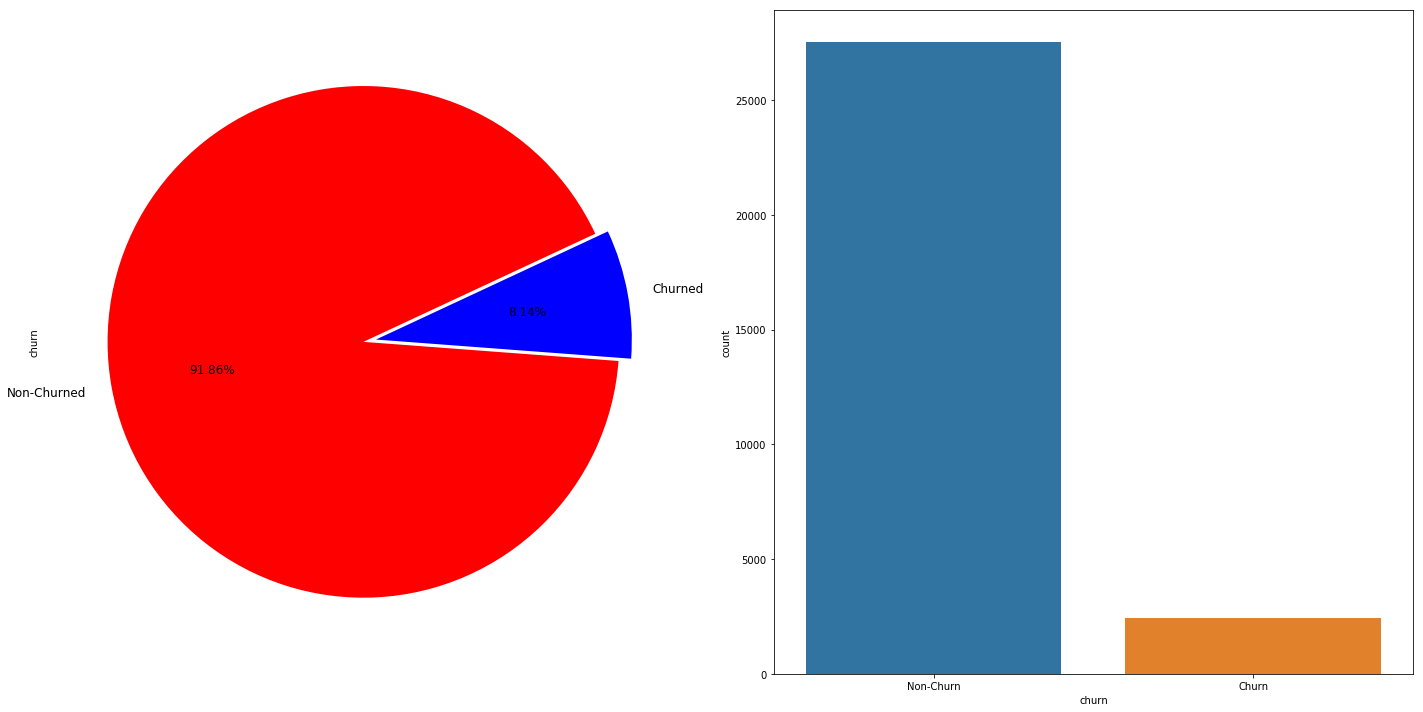

In [20]:
#plt.figure(figsize=(25,10))
f,ax = plt.subplots(1,2,figsize=(20,10))

colors = ["Red", "Blue"]
labels = 'Non-Churned','Churned'
y.value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax =ax[0],colors = colors, labels = labels, fontsize =12, startangle=25)
#ax[0].set_ylabel('% of ADR vs Non-ADR')

palette = ["Red", "Blue"]
sns.countplot(x='churn', data=telechurn)
ax[1].set_xticklabels(['Non-Churn','Churn'],rotation=0, rotation_mode="anchor")
plt.tight_layout()

#### Split dataset into train and test data

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(21000, 154)
(9001, 154)


## Data Modeling

#### Applying PCA on the dataset

In [22]:
pca = PCA(svd_solver='randomized', random_state=42)

In [23]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [24]:
len(pca.components_)

154

In [25]:
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

,PC1,PC2,Feature
0,-0.007102,0.156604,arpu_6
1,-0.004478,0.187704,arpu_7
2,0.001658,0.192097,arpu_8
3,-0.047712,0.124639,onnet_mou_6
4,-0.052961,0.150478,onnet_mou_7


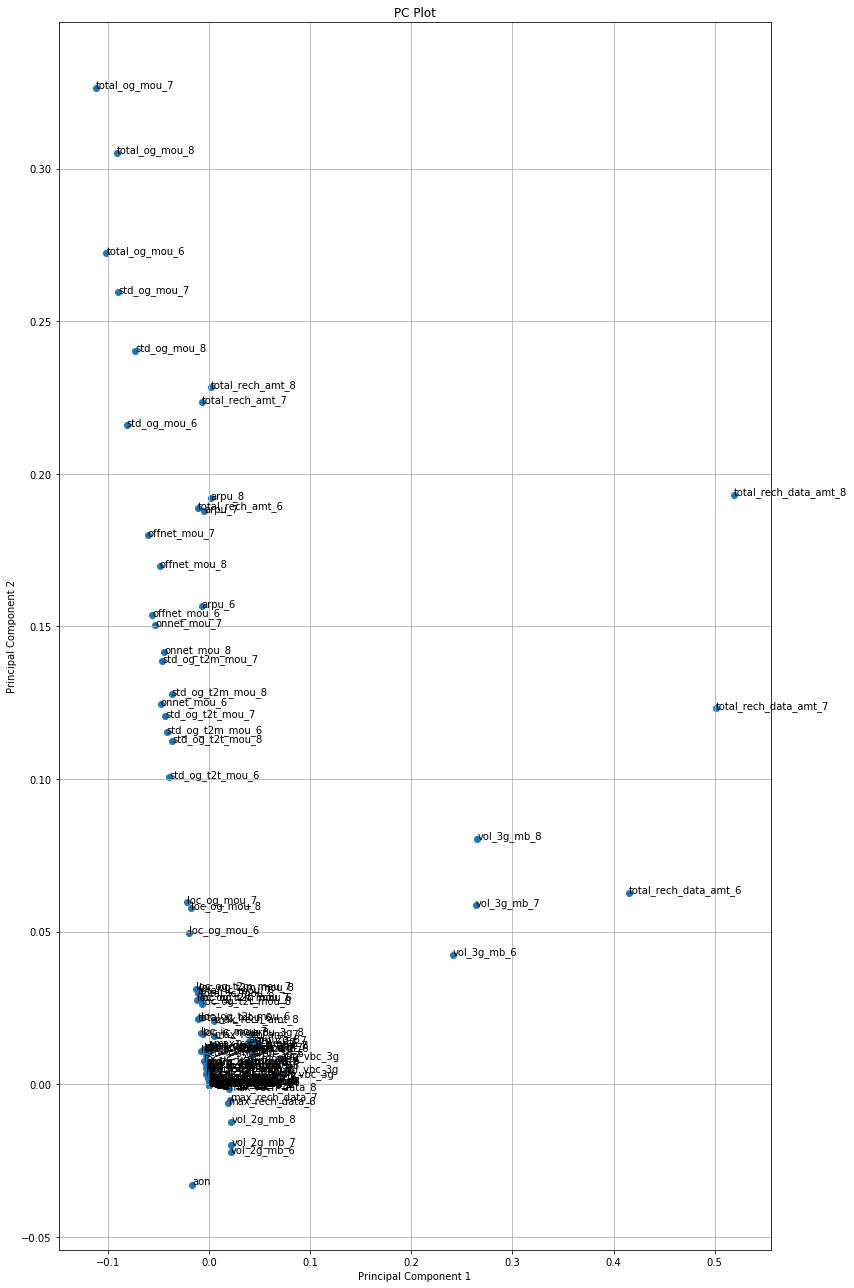

In [26]:
%matplotlib inline
fig = plt.figure(figsize = (12,18))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC Plot')
plt.grid()

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [27]:
#Analysing variance ratio
pca.explained_variance_ratio_

array([2.74998088e-01, 1.64879272e-01, 8.11738485e-02, 7.36374222e-02,
       5.95846578e-02, 5.57002515e-02, 4.15830459e-02, 3.66949559e-02,
       3.36011142e-02, 3.02274210e-02, 1.89055606e-02, 1.43434710e-02,
       1.34531455e-02, 1.14101012e-02, 9.99061083e-03, 8.56093226e-03,
       7.15468320e-03, 6.21502099e-03, 5.30852805e-03, 4.52920194e-03,
       4.16206555e-03, 3.79398092e-03, 3.20399770e-03, 2.91553755e-03,
       2.64889270e-03, 2.56407167e-03, 2.52145127e-03, 2.20080668e-03,
       2.13483051e-03, 1.82342071e-03, 1.74928729e-03, 1.67759385e-03,
       1.42911614e-03, 1.35054245e-03, 1.17247003e-03, 1.07156149e-03,
       9.88240750e-04, 8.81073788e-04, 7.29051790e-04, 6.28089570e-04,
       5.72308646e-04, 5.39378134e-04, 5.07464880e-04, 4.85289850e-04,
       4.67696566e-04, 4.40509440e-04, 4.13446674e-04, 4.02205231e-04,
       3.96359143e-04, 3.72669276e-04, 3.59468209e-04, 3.26742477e-04,
       3.05791485e-04, 2.75056538e-04, 2.71373702e-04, 2.53305656e-04,
      

#### Making the screeplot that is plotting the cumulative variance against the number of components

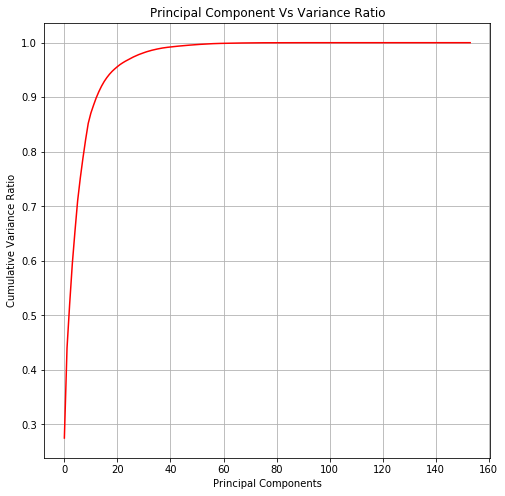

In [28]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='red')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Principal Component Vs Variance Ratio')
plt.grid()
plt.show()

#### It looks like 10 Principal Components are enough to explain around 95% of the variance in the dataset

#### Using incremental PCA for efficiency as it saves a lot of time on larger datasets

In [29]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 10)
df_pca = pca_final.fit_transform(X)
df_pca.shape

(30001, 10)

In [30]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-40.985068,-1803.734960,428.351221,253.509040,-334.275553,-246.691857,-82.966001,93.714522,-208.499844,208.913429
1,-896.784082,1011.745175,-1145.482061,-1439.745130,662.664983,149.238757,-1131.243624,-962.694457,-1339.561650,2187.253852
2,-234.919652,-973.307258,344.217751,349.432494,-774.820006,-9.092670,-101.759818,-690.582313,136.875151,-176.182708
3,-1384.539524,913.262870,519.328034,475.152314,-269.546147,-176.248556,-1107.944074,572.383366,-200.656652,-263.628707
4,440.621445,-1257.510012,363.557898,-248.840896,-824.011668,-2.115604,-270.230560,-326.231189,-351.234086,-301.696961


In [31]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

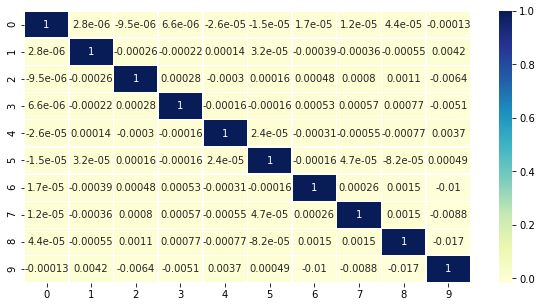

In [32]:
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot=True,linewidths=.5,cmap='YlGnBu')

In [33]:
pca_train = pca_final.fit_transform(X_train)
pca_train.shape

(21000, 10)

In [34]:
#Applying selected components to the test data - 10 components
pca_test = pca_final.transform(X_test)
pca_test.shape

(9001, 10)

In [35]:
def get_score(model,X_train,X_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("The accuracy for Model is:",accuracy_score(y_test,y_pred))
    print('roc = ',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
    print('recall = ',recall_score(y_test, y_pred))

#### Applying Logistic regression

In [36]:
log_clf = LogisticRegression(random_state=42, class_weight='balanced')

In [37]:
get_score(log_clf,X_train,X_test)

[[6865 1435]
 [ 129  572]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8300
           1       0.29      0.82      0.42       701

   micro avg       0.83      0.83      0.83      9001
   macro avg       0.63      0.82      0.66      9001
weighted avg       0.93      0.83      0.86      9001

The accuracy for Model is: 0.8262415287190312
roc =  0.8862540604643968
recall =  0.8159771754636234


C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
get_score(log_clf,pca_train,pca_test)

[[6111 2189]
 [ 155  546]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      8300
           1       0.20      0.78      0.32       701

   micro avg       0.74      0.74      0.74      9001
   macro avg       0.59      0.76      0.58      9001
weighted avg       0.91      0.74      0.80      9001

The accuracy for Model is: 0.7395844906121543
roc =  0.8306266435213036
recall =  0.7788873038516405


##### Applying Random forest

In [39]:
rf_clf = RandomForestClassifier(random_state = 42, n_estimators= 100,n_jobs =-1, class_weight = {0:1,1:10})
get_score(rf_clf,X_train,X_test)

[[8181  119]
 [ 378  323]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8300
           1       0.73      0.46      0.57       701

   micro avg       0.94      0.94      0.94      9001
   macro avg       0.84      0.72      0.77      9001
weighted avg       0.94      0.94      0.94      9001

The accuracy for Model is: 0.9447839128985668
roc =  0.9207588986473711
recall =  0.4607703281027104


In [40]:
params = { 'n_estimators':[150],
          'max_features': ['auto','log2','sqrt'] ,
          'class_weight':['balanced','balanced_subsample'],
          'max_depth' : [2,4,8] , 
          'min_samples_leaf':[20,22,24],
          'criterion' : ['gini']
            }
g_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 42,n_jobs = -1 ), scoring = 'recall', cv =3,
                                                           param_grid = params)
g_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150], 'max_features': ['auto', 'log2', 'sqrt'], 'class_weight': ['balanced', 'balanced_subsample'], 'max_depth': [2, 4, 8], 'min_samples_leaf': [20, 22, 24], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [41]:
b=g_search.best_params_
print(b)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 24, 'n_estimators': 150}


In [42]:
g_search.best_score_

0.7333333333333333

#### Applying XGBoost

In [43]:
param_test = {
  'min_child_weight':[5,6],
  'max_depth': range(3,5),
  'gamma':[0,0.2,0.4]
    
}
gsearch = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test, scoring='recall',n_jobs=4,iid=False, cv=3)
gsearch.fit(X_train, y_train)
#print(gsearch.grid_scores_)
print("gsearch.best_params_",gsearch.best_params_)
print("gsearch.best_score_",gsearch.best_score_)

gsearch.best_params_ {'gamma': 0.2, 'max_depth': 4, 'min_child_weight': 6}
gsearch.best_score_ 0.5310344827586206


In [44]:
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8,
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29)


modelXg.fit(X_train, y_train)
y_xgboost = modelXg.predict(X_test)

In [45]:
from sklearn.metrics import precision_score, recall_score,f1_score
                                                  
print(confusion_matrix(y_test, y_xgboost))
predictions = [value for value in y_xgboost]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, modelXg.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, modelXg.predict_proba(X_train)[:,1]))

[[7954  346]
 [ 220  481]]
Accuracy_score: 93.71% on test dataset
precision_score: 58.16% on test dataset
recall_score: 68.62% on test dataset
f1_score: 62.96% on test dataset
roc_auc test set 0.9281638966708489
roc_auc training set 0.9807377269309271


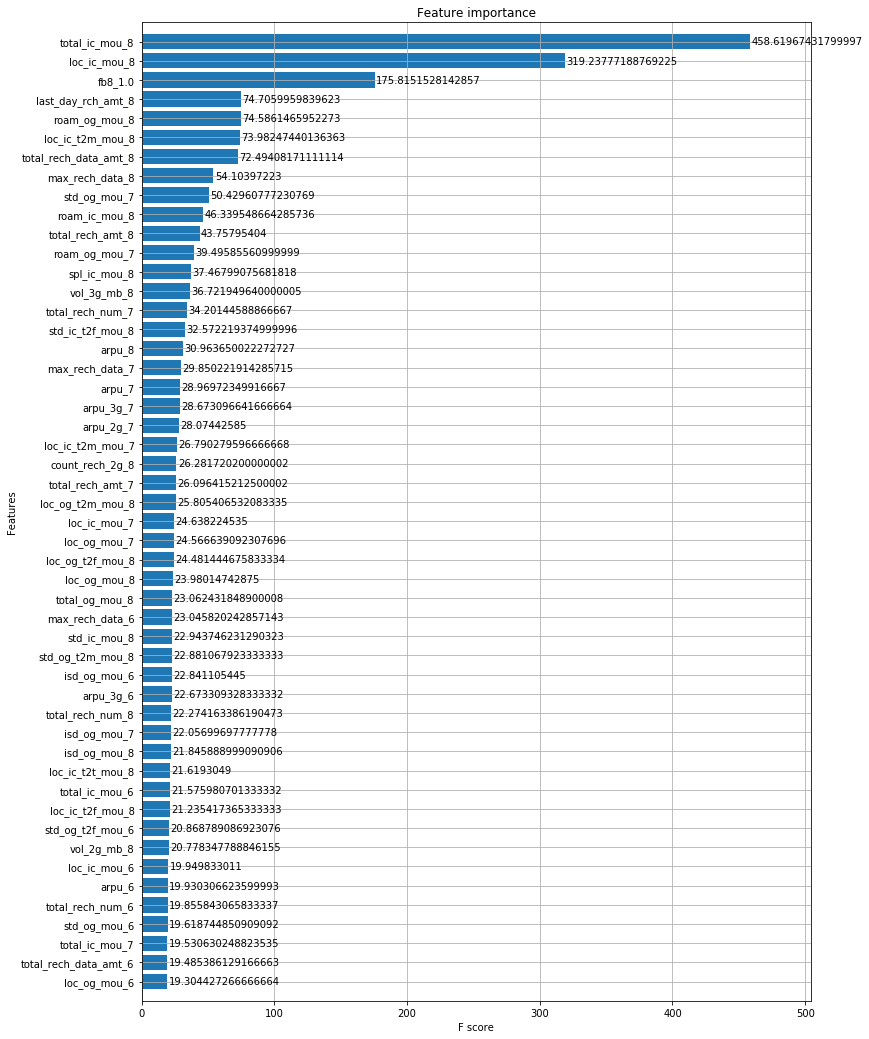

In [46]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(modelXg,importance_type='gain', max_num_features=50, height=0.8, ax=ax)
plt.show()

In [47]:
# Columns and Values in order of inportance in a sorted normalized format
sorted_idx = np.argsort(modelXg.feature_importances_)[::-1]
#X_train.columns[sorted_idx[:50]]
for index in sorted_idx:
    print([X_train.columns[index], modelXg.feature_importances_[index]]) 

['total_ic_mou_8', 0.12232714]
['loc_ic_mou_8', 0.08514995]
['fb8_1.0', 0.046894994]
['last_day_rch_amt_8', 0.019926252]
['roam_og_mou_8', 0.019894283]
['loc_ic_t2m_mou_8', 0.019733269]
['total_rech_data_amt_8', 0.01933627]
['max_rech_data_8', 0.014431097]
['std_og_mou_7', 0.013451036]
['roam_ic_mou_8', 0.0123601]
['total_rech_amt_8', 0.011671513]
['roam_og_mou_7', 0.010534689]
['spl_ic_mou_8', 0.009993798]
['vol_3g_mb_8', 0.009794807]
['total_rech_num_7', 0.009122516]
['std_ic_t2f_mou_8', 0.008687954]
['arpu_8', 0.008258902]
['max_rech_data_7', 0.007961919]
['arpu_7', 0.0077270637]
['arpu_3g_7', 0.007647945]
['arpu_2g_7', 0.0074882624]
['loc_ic_t2m_mou_7', 0.0071457434]
['count_rech_2g_8', 0.007010096]
['total_rech_amt_7', 0.0069606695]
['loc_og_t2m_mou_8', 0.006883049]
['loc_ic_mou_7', 0.006571728]
['loc_og_mou_7', 0.006552634]
['loc_og_t2f_mou_8', 0.0065299105]
['loc_og_mou_8', 0.0063962]
['total_og_mou_8', 0.006151418]
['max_rech_data_6', 0.0061469874]
['std_ic_mou_8', 0.0061197616

In [48]:
# Use feature importance for feature selection using threshold
selection = SelectFromModel(modelXg, threshold=0.06, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# evaluate model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
accuracy_score(y_test,y_pred)

0.9327852460837684